In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Overview
### 1. MRW file

In [3]:
xls = pd.ExcelFile('dataset/MRW_v2.xlsx')
sheet1 = pd.read_excel(xls, 'Transaction')
sheet2 = pd.read_excel(xls, 'SKU_point_Ltr')
sheet3 = pd.read_excel(xls, 'Garange Profile')
sheet4 = pd.read_excel(xls, 'User')

In [4]:
print(sheet1.shape)
# sheet1.sample(5)

(215656, 5)


In [5]:
sheet1_clean = sheet1.groupby(['Distributor', 'UserId', 'ScanDate', 'ProductName', 'ProductSKU']).agg({'ScanDate': 'count'})\
                            .rename(columns={'ScanDate': 'Qty'}).reset_index()
sheet1_clean.head()

,Distributor,UserId,ScanDate,ProductName,ProductSKU,Qty
0,A,EXL_1569941239614,2023-01-11,Mobil 1 Gold,Mobil 1 Gold 4L - 6L,2
1,A,EXL_1569941239614,2023-01-11,Silver Large,Silver - Large 4L,2
2,A,EXL_1569941239614,2023-01-14,Silver Large,Silver - Large 4L,1
3,A,EXL_1569941239614,2023-02-06,Silver Large,Silver - Large 4L,5
4,A,EXL_1569941239614,2023-02-07,Gold Large,Gold - Large 4L,1


In [6]:
# validation
sheet1_clean[sheet1_clean['UserId'] == 'EXL_1692444744991']

,Distributor,UserId,ScanDate,ProductName,ProductSKU,Qty
21474,B,EXL_1692444744991,2023-08-19,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,1
21475,B,EXL_1692444744991,2023-08-22,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,1
21476,B,EXL_1692444744991,2023-08-24,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,18
21477,B,EXL_1692444744991,2023-11-29,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,12


In [7]:
print(sheet2.shape)
# sheet2.head()

(10, 3)


In [8]:
print(sheet3.shape)
# sheet3.head()

(4006, 5)


In [9]:
print(sheet4.shape)
# sheet4.head()

(4719, 3)


In [10]:
merge_1 = pd.merge(sheet1_clean, sheet2, on='ProductSKU', how='left')
merge_2 = pd.merge(merge_1, sheet3, left_on=['UserId', 'Distributor'], right_on=['OwnerId', 'Distributor'], 
                   how='left')
mrw = pd.merge(merge_2, sheet4, on='UserId', how='left')

In [11]:
print(mrw.shape)
mrw.head()

(36015, 14)


,Distributor,UserId,ScanDate,ProductName,ProductSKU,Qty,Points,Volume (L),OwnerId,Postcode,Province,District,GarageId,UserType
0,A,EXL_1569941239614,2023-01-11,Mobil 1 Gold,Mobil 1 Gold 4L - 6L,2,60,6,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
1,A,EXL_1569941239614,2023-01-11,Silver Large,Silver - Large 4L,2,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
2,A,EXL_1569941239614,2023-01-14,Silver Large,Silver - Large 4L,1,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
3,A,EXL_1569941239614,2023-02-06,Silver Large,Silver - Large 4L,5,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner
4,A,EXL_1569941239614,2023-02-07,Gold Large,Gold - Large 4L,1,50,4,EXL_1569941239614,10540.0,สมุทรปราการ,เขตบางพลี,XT8304,Owner


Handle null/ missing values

In [12]:
mrw.columns

Index(['Distributor', 'UserId', 'ScanDate', 'ProductName', 'ProductSKU', 'Qty',
       'Points', 'Volume (L)', 'OwnerId', 'Postcode', 'Province', 'District ',
       'GarageId', 'UserType'],
      dtype='object')

In [13]:
mrw.dtypes

Distributor            object
UserId                 object
ScanDate       datetime64[ns]
ProductName            object
ProductSKU             object
Qty                     int64
Points                  int64
Volume (L)              int64
OwnerId                object
Postcode              float64
Province               object
District               object
GarageId               object
UserType               object
dtype: object

In [14]:
mrw.rename(columns={'District ': 'District'}, inplace=True)
mrw.isnull().sum()

Distributor       0
UserId            0
ScanDate          0
ProductName       0
ProductSKU        0
Qty               0
Points            0
Volume (L)        0
OwnerId        3649
Postcode       3757
Province       3649
District       3649
GarageId          0
UserType          0
dtype: int64

In [15]:
# drop records with no province
null_province = mrw[ mrw['Province'].isnull() ].index
mrw.drop(index=null_province, inplace=True)

In [16]:
# fill null Postcode with 0
mrw['Postcode'] = mrw['Postcode'].fillna(0).astype('int')
mrw['Postcode'] = mrw['Postcode'].astype('str').replace('0', '-')

### EDA
Distribution of Top10 garage using (scan)

In [17]:
mrw.columns

Index(['Distributor', 'UserId', 'ScanDate', 'ProductName', 'ProductSKU', 'Qty',
       'Points', 'Volume (L)', 'OwnerId', 'Postcode', 'Province', 'District',
       'GarageId', 'UserType'],
      dtype='object')

<Axes: xlabel='ScanDate', ylabel='Qty'>

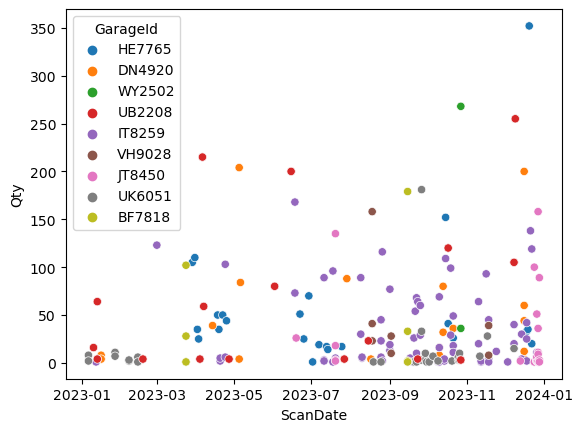

In [18]:
garage_used_per_day = mrw.groupby(['GarageId', 'ScanDate']).agg({'Qty': 'sum'}).reset_index()
top10_garage = garage_used_per_day.sort_values('Qty', ascending=False).head(10)

top10_garage_used = pd.merge(top10_garage['GarageId'], mrw, on='GarageId', how='left')
sns.scatterplot(data=top10_garage_used, x='ScanDate', y='Qty', hue='GarageId')

In [19]:
used_by_garage = mrw.groupby(['GarageId']).agg({'Qty': 'sum'}).reset_index()
top10_used = used_by_garage.sort_values('Qty', ascending=False).head(10)
top10_used

,GarageId,Qty
434,IT8259,2519
403,IB0726,2329
307,GD8373,2113
381,HR9453,2062
1235,ZB1266,1900
858,RH6974,1720
1081,VY9051,1420
678,NW8593,1357
691,OC2412,1349
362,HE7765,1327


In [20]:
# mrw[ mrw['GarageId'] == 'IT8259' ]

In [21]:
for garageID in top10_used['GarageId']:
    province = top10_garage_used.loc[ top10_garage_used['GarageId'] == garageID, 'Province'].dropna().unique()
    print(f"{garageID} province: {province}")

IT8259 province: ['กรุงเทพมหานคร']
IB0726 province: []
GD8373 province: []
HR9453 province: []
ZB1266 province: []
RH6974 province: []
VY9051 province: []
NW8593 province: []
OC2412 province: []
HE7765 province: ['พระนครศรีอยุธยา']


In [22]:
# กลาง 4 เหนือ 2 ใต้ 2 ตะวันออก 2
region_count = {}

for garageID in top10_garage:
    provinces = top10_garage_used.loc[top10_garage_used['GarageId'] == garageID, 'Province'].dropna().unique()
    
    for province in provinces:
            print(f"{garageID} province: {province}")


In [23]:
product_per_garage = top10_garage_used[['GarageId', 'ProductSKU', 'Qty', 'Province']]\
                        .groupby(['GarageId', 'ProductSKU'])\
                        .agg({'Qty': 'sum'}).apply(lambda x: np.sort(x))

with pd.option_context('display.max_rows', None): 
    print(product_per_garage)
    
# delvac = product_per_garage[ product_per_garage['ProductSKU'].str.contains('Delvac Modern') ]['GarageId']
# product_per_garage[ product_per_garage['GarageId'].isin(delvac) ].reset_index(drop=True)

                                       Qty
GarageId ProductSKU                       
BF7818   Charcoal - Large 4L - 5L        1
         Mobil 1 Gold 4L - 6L            1
         Mobil Delvac Modern 7L          1
         Mobil Super AIO - 7L            1
         Mobil Super AIO 3L - 6L         3
         Mobil Super FF 4L - 7L          4
DN4920   Charcoal - Large 4L - 5L        4
         Gold - Large 4L                 4
         Mobil 1 Gold 4L - 6L            7
         Mobil Delvac Modern 7L         12
         Mobil Super AIO - 7L           13
         Mobil Super FF 4L - 7L         13
         Mobil_Delvac_Legend_6L_-_7L    19
         Silver - Large 4L              24
HE7765   Mobil Super FF 4L - 7L         31
IT8259   Gold - Large 4L                36
         Mobil 1 Gold 4L - 6L           46
         Mobil Super FF 4L - 7L         51
         Silver - Large 4L              54
JT8450   Charcoal - Large 4L - 5L       60
         Gold - Large 4L                61
         Mo

Proportional product SKU

In [24]:
sku_qty_totals = mrw.groupby('ProductSKU').agg({'Qty': 'sum'}).reset_index()
sku_qty_totals = sku_qty_totals.sort_values(by='Qty', ascending=False).reset_index(drop=True)
sku_qty_totals['percent'] = sku_qty_totals['Qty'] / sku_qty_totals['Qty'].sum()

sku_qty_totals

,ProductSKU,Qty,percent
0,Mobil Super FF 4L - 7L,111493,0.619364
1,Mobil Delvac Modern 7L,21862,0.121447
2,Silver - Large 4L,12257,0.068090
3,Mobil Super AIO - 7L,10536,0.058529
4,Charcoal - Large 4L - 5L,9723,0.054013
5,Mobil_Delvac_Legend_6L_-_7L,5827,0.032370
6,Gold - Large 4L,4476,0.024865
7,Mobil 1 Gold 4L - 6L,3013,0.016738
8,Blue - Large 4L - 5L,478,0.002655
9,Mobil Super AIO 3L - 6L,347,0.001928


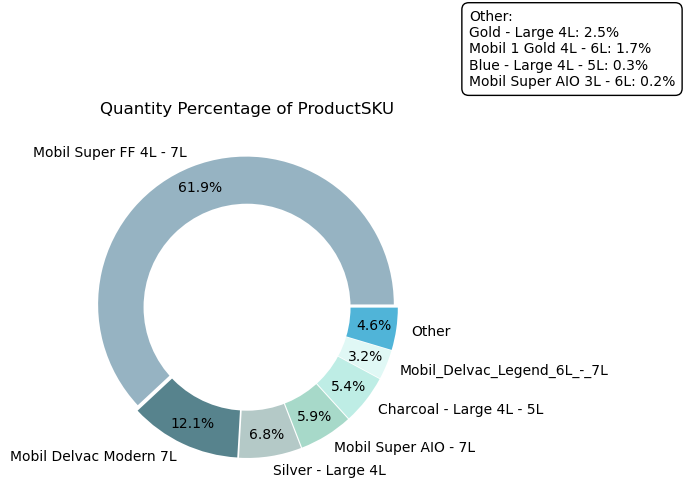

In [25]:
color = ['#96b3c2', '#57838d', '#b4c9c7', '#a7d9c9', '#beede5',
         '#e0f8f5', '#50b4d8', '#9eddef', '#b7eaf7', '#d7e2ea']
explode = (0.02, )*10
threshold = 0.03  # 3%
total_qty = sku_qty_totals['Qty'].sum()
small_slices = sku_qty_totals[sku_qty_totals['Qty'] / total_qty < threshold]
large_slices = sku_qty_totals[sku_qty_totals['Qty'] / total_qty >= threshold]

other = pd.DataFrame({'ProductSKU': ['Other'], 'Qty': [small_slices['Qty'].sum()]})
new_data = pd.concat([large_slices, other])

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(new_data['Qty'], labels=new_data['ProductSKU'], autopct='%1.1f%%', 
                                  pctdistance=0.85, colors=color[:len(new_data)], explode=[0.02]*len(new_data))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Quantity Percentage of ProductSKU')

small_slices = small_slices.copy()
small_slices['Percentage'] = (small_slices['Qty'] / total_qty) * 100

other_contents = "\n".join([f"{row['ProductSKU']}: {row['Percentage']:.1f}%" for _, row in small_slices.iterrows()])
props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black')
plt.text(1.5, 1.5, f"Other:\n{other_contents}", bbox=props, fontsize=10)

plt.show()

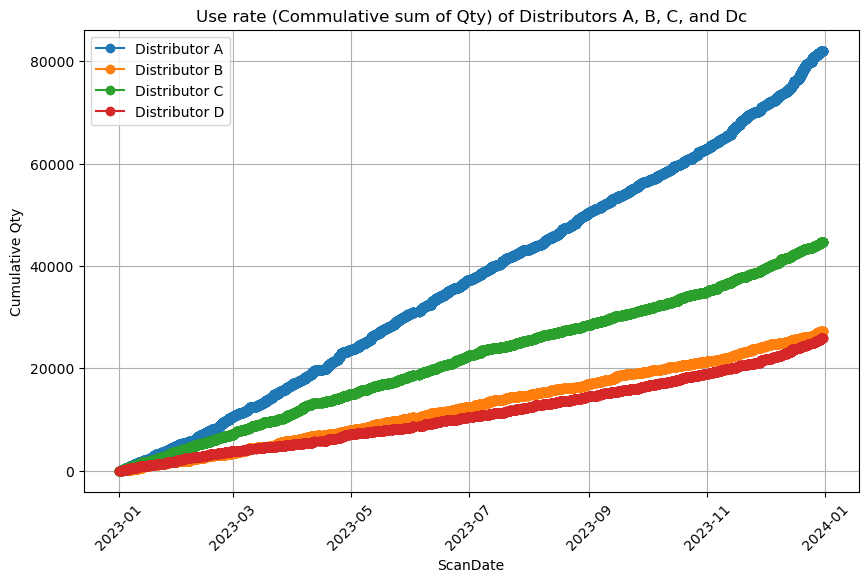

In [26]:
# List of distributors to plot
distributors = ['A', 'B', 'C', 'D']

# Plotting the cumulative sum line graph for each distributor
plt.figure(figsize=(10, 6))

for distributor in distributors:
    # Filter data for the current distributor
    filtered_mrw = mrw[mrw['Distributor'] == distributor]
    
    # Sort data by ScanDate
    filtered_mrw = filtered_mrw.sort_values(by='ScanDate')
    
    # Calculate cumulative sum of Qty
    filtered_mrw['CumulativeQty'] = filtered_mrw['Qty'].cumsum()
    
    # Plot the line graph
    plt.plot(filtered_mrw['ScanDate'], filtered_mrw['CumulativeQty'], marker='o', linestyle='-', label=f'Distributor {distributor}')

plt.title('Use rate (Commulative sum of Qty) of Distributors A, B, C, and Dc')
plt.xlabel('ScanDate')
plt.ylabel('Cumulative Qty')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

### 2. MER file

In [27]:
mer = pd.ExcelFile('dataset/2. MER PointTransaction 2023_RetailsResellers_Final.xlsx')
mer_sheet1 = pd.read_excel(mer, 'MER Transaction')
mer_sheet2 = pd.read_excel(mer, 'Point Per Litre')

In [28]:
print(mer_sheet1.shape)
mer_sheet1.head()

(9429, 8)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L)
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080


In [29]:
print(mer_sheet2.shape)
mer_sheet2.head()

(145, 2)


,MatNo,Points
0,144673,10
1,140521,10
2,144473,10
3,145832,10
4,140418,10


In [30]:
mer = pd.merge(mer_sheet1, mer_sheet2, on='MatNo', how='left')
print(mer.shape)
mer.head()

(9429, 9)


,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
0,2023-02-14,A,ERW_AI8N2021070006,Retails,Pathum Thani,123150,"MOBIL MULTIPURPOSE ATF, 208LT DR",7168,1
1,2023-04-20,D,ERW_DBG72020110082,Reseller,Songkhla,124213,MOBIL ATF 220 D 208LT,912,1
2,2023-10-19,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7340,1
3,2023-07-25,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,1640,1
4,2023-10-12,D,ERW_DBG72020110082,Reseller,Songkhla,124216,MOBIL ATF 220 P1/20LT,7080,1


Null/ missing values

In [31]:
mer.columns

Index(['Invoicedate', 'Distributor', 'GroupId', 'Type', 'Provincename',
       'MatNo', 'Material Name', 'New_Volume(L)', 'Points'],
      dtype='object')

In [32]:
mer.isnull().sum()

Invoicedate      0
Distributor      0
GroupId          0
Type             0
Provincename     0
MatNo            0
Material Name    0
New_Volume(L)    0
Points           0
dtype: int64

Fix Typos of Material Name

In [33]:
mat_default = mer_sheet1.sort_values(['MatNo', 'Material Name']).groupby('MatNo').head(1)\
                        .loc[:, ['MatNo', 'Material Name']].set_index('MatNo')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('โมบิล', 'MOBIL')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('เดลแวค', 'DELVAC')
mat_default['Material Name'] = mat_default['Material Name'].str.replace('สเปเชียล', 'SPECIAL')
mat_default.loc[ mat_default.index == 140563, 'Material Name'] = 'MOBIL DELVAC 1 GEAR OIL 75W90, 1/35LB'

mat_default.shape
# with pd.option_context('display.max_rows', None):
#     display(mat_default)

(145, 1)

In [34]:
for i in mer['MatNo'].unique():
    mer.loc[mer['MatNo'] == i, 'Material Name'] = mat_default.loc[i, 'Material Name']
            
mer[ ['MatNo', 'Material Name']].drop_duplicates().shape

(145, 2)

In [35]:
mer.dropna(inplace=True)
mer.isnull().any()

Invoicedate      False
Distributor      False
GroupId          False
Type             False
Provincename     False
MatNo            False
Material Name    False
New_Volume(L)    False
Points           False
dtype: bool

#### EDA
Points per อู่

In [36]:
mer['Provincename'] = mer['Provincename'].replace('N\A', np.nan)
mer[mer['Provincename'].isnull()].head()

,Invoicedate,Distributor,GroupId,Type,Provincename,MatNo,Material Name,New_Volume(L),Points
1705,2023-11-03,A,ERW_A7QF2022060002,Retails,NaN,140043,"MOBIL ATF 3309 , 12x1 LT CTN",5392,1
1845,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140418,MOBIL 1 TBD 5W-40 4X6L/CAR,5088,10
1910,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,140521,"MOBIL 1 0W-40 (SN), 4x4LT CTN",608,10
2260,2023-02-13,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 4X4L/CAR,6544,1
2275,2023-10-26,A,ERW_A7QF2022060003,Retails,NaN,142923,MOBIL SPECIAL 20W-50 4X4L/CAR,1104,1


In [37]:
# time_series = mrw.copy()
# time_series['Month'] = mrw['ScanDate'].dt.month
# time_series['Year'] = mrw['ScanDate'].dt.year
# time_series['Quarter'] = mrw['ScanDate'].dt.quarter

# sales_per_month = time_series.groupby(['Year', 'Month']).agg({'UserId': 'count'})\
#                                 .rename(columns={'UserId': 'quantity'}).reset_index()
# sales_per_quarter = time_series.groupby(['Year', 'Quarter']).agg({'UserId': 'count'})\
#                                 .rename(columns={'UserId': 'quantity'}).reset_index()

# fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# ax[0].plot(sales_per_month['Month'], sales_per_month['quantity'])
# ax[0].set_title('User by month')

# ax[1].plot(sales_per_quarter['Quarter'], sales_per_quarter['quantity'])
# ax[1].set_title('User by quarter')

**Churn detection**\
hypothesis: if trending of volume order by quarter decrease over time, we will classify as 'Churn'

In [79]:
mer['quarter'] = mer['Invoicedate'].dt.quarter
volume_by_quarter = mer.groupby(['GroupId', 'MatNo', 'quarter'])\
                        .agg({'New_Volume(L)': 'sum'})
volume_by_quarter = volume_by_quarter.sort_values(by=['GroupId', 'MatNo', 'quarter']).reset_index()
volume_by_quarter.head(5)

,GroupId,MatNo,quarter,New_Volume(L)
0,ERW_A1DS2023040002,143874,3,2328
1,ERW_A1DS2023040002,143874,4,5532
2,ERW_A1DS2023040002,143877,2,12544
3,ERW_A1DS2023040002,143877,3,8120
4,ERW_A1DS2023040002,143877,4,5040


In [102]:
churn_df = pd.pivot_table(data=volume_by_quarter, values='New_Volume(L)', 
               index=['GroupId', 'MatNo'], columns='quarter').reset_index()
churn_df = churn_df.fillna(0)
churn_df['volume_diff'] = 0

# iterate over quarter for calculating volume trending
for ind in churn_df.index:
    result = 0
    for quarter in [4, 3, 2]:
        temp1 = churn_df.loc[ind, quarter]  # quarter หลัง 
        temp2 = churn_df.loc[ind, quarter-1]  # quarter ก่อน
        if temp1 != 0 and temp2 != 0:
            result += temp1 - temp2
        else:
            continue
        
        churn_df.loc[ind, 'volume_diff'] = result
        
# Churn or not
churn_df['Churn'] = ' '
for ind in churn_df.index:
    if churn_df.loc[ind, 'volume_diff'] < 0:
        churn_df.loc[ind, 'Churn'] = ' Yes'
    else:
        churn_df.loc[ind, 'Churn'] = 'No'

churn_df.sample(10)

quarter,GroupId,MatNo,1,2,3,4,volume_diff,Churn
1993,ERW_BM2U2020110030,143576,5736.0,0.0,0.0,0.0,0,No
1828,ERW_BM2U2020110002,145570,0.0,0.0,3880.0,15600.0,11720,No
2262,ERW_BM2U2020110062,145570,0.0,0.0,2480.0,7660.0,5180,No
3390,ERW_C08P2020090073,135896,0.0,12042.0,7452.0,0.0,-4590,Yes
3647,ERW_C08P2020090135,140417,281.0,0.0,0.0,0.0,0,No
431,ERW_AMBP2020110050,143132,0.0,1840.0,0.0,5280.0,0,No
3040,ERW_BXG52021040275,140521,0.0,0.0,1952.0,0.0,0,No
2356,ERW_BM2U2020110077,145573,0.0,10968.0,9540.0,0.0,-1428,Yes
355,ERW_AMBP2020110030,140418,9296.0,0.0,0.0,0.0,0,No
3422,ERW_C08P2020090082,145577,0.0,1148.0,8092.0,13356.0,12208,No


In [42]:
if not os.path.exists("clean_data"):
    os.makedirs("clean_data")
    
mrw.to_csv('clean_data/MRW_clean.csv', index=False)
mer.to_csv('clean_data/MER_clean.csv', index=False)
churn_df.to_csv('Machine_learning/churn.csv', index=False)